In [37]:
from google.colab import drive

drive.mount('/content/drive')

FOLDERNAME = 'COMP5329/assignments/assignment1/'

%cd drive/My\ Drive
%cd $FOLDERNAME

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive'
/content/drive/My Drive/COMP5329/assignments/assignment1
[Errno 2] No such file or directory: 'COMP5329/assignments/assignment1/'
/content/drive/My Drive/COMP5329/assignments/assignment1


In [38]:
import random
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from matplotlib import animation
%matplotlib inline

from data_utils import get_data
from gradient_check import *
from fc_net import MLP
from layers import *

running with  None
Finished epoch 1 / 10: loss 2.174924, train 0.416000, val 0.240000
Finished epoch 2 / 10: loss 1.850020, train 0.448000, val 0.250000
Finished epoch 3 / 10: loss 2.093639, train 0.432000, val 0.285000
Finished epoch 4 / 10: loss 1.860577, train 0.568000, val 0.282000
Finished epoch 5 / 10: loss 1.617255, train 0.572000, val 0.268000
Finished epoch 6 / 10: loss 1.501826, train 0.564000, val 0.261000
Finished epoch 7 / 10: loss 1.700010, train 0.540000, val 0.234000
Finished epoch 8 / 10: loss 1.499317, train 0.564000, val 0.268000
Finished epoch 9 / 10: loss 1.534150, train 0.644000, val 0.278000
Finished epoch 10 / 10: loss 1.676622, train 0.600000, val 0.272000
running with  mean_sub
Finished epoch 1 / 10: loss 2.433769, train 0.292000, val 0.180000
Finished epoch 2 / 10: loss 2.186712, train 0.372000, val 0.210000
Finished epoch 3 / 10: loss 1.705529, train 0.512000, val 0.231000
Finished epoch 4 / 10: loss 1.714392, train 0.472000, val 0.252000
Finished epoch 5 / 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


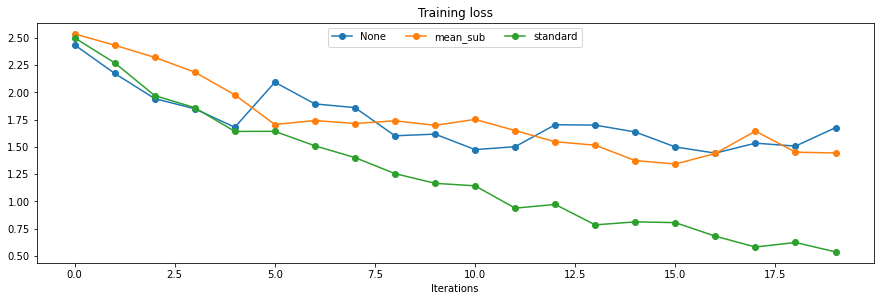

In [39]:
"""
    Data preprocessing: convergence rate (subsample of data)
    
    Mean Subtraction: no noticeable difference in convergence rate
    standardization: faster in convergence rate
"""

solvers = {}
for preprocess in [None,'mean_sub', 'standard']:
    print('running with ', preprocess)
    X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_data(mode=preprocess)
    model = MLP([100, 100], activation='tanh', reg=5e-5)
    solver = model.fit(X_dev, y_dev, X_val, y_val, 
                        learning_rate_decay=1, sample_batches=True,
                        num_epochs=10,learning_rate=0.8,update_rule='sgd')

    solvers[preprocess] = solver

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iterations')

for preprocess, solver in list(solvers.items()):
  plt.subplot(3, 1, 1)
  plt.plot(solver['loss_history'], '-o', label=preprocess if preprocess != None else 'None')

for i in [1]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

In [40]:
# get and preprocess the data
X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_data(mode='standard')

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('dev data shape: ', X_dev.shape)
print('dev labels shape: ', y_dev.shape)

# print('Train data mean under axis = 0: ',  X_train.mean(axis=0))
# print('Validation data shape mean under axis = 0: ',  X_val.mean(axis=0))
# print('Test data shape mean under axis = 0: ',  X_test.mean(axis=0))
# print('dev data shape mean under axis = 0: ',  X_dev.mean(axis=0))

Train data shape:  (49000, 128)
Train labels shape:  (49000,)
Validation data shape:  (1000, 128)
Validation labels shape:  (1000,)
Test data shape:  (10000, 128)
Test labels shape:  (10000,)
dev data shape:  (500, 128)
dev labels shape:  (500,)


In [41]:
# print('Train data mean under axis = 0: ',  X_train.mean(axis=0))
# print('Validation data shape mean under axis = 0: ',  X_val.mean(axis=0))
# print('Test data shape mean under axis = 0: ',  X_test.mean(axis=0))
# print('dev data shape mean under axis = 0: ',  X_dev.mean(axis=0))

running with  None
Finished epoch 1 / 10: loss 2.176226, train 0.532000, val 0.149000
Finished epoch 2 / 10: loss 1.857493, train 0.664000, val 0.187000
Finished epoch 3 / 10: loss 1.601801, train 0.684000, val 0.199000
Finished epoch 4 / 10: loss 1.408433, train 0.772000, val 0.221000
Finished epoch 5 / 10: loss 1.228355, train 0.840000, val 0.221000
Finished epoch 6 / 10: loss 1.022945, train 0.856000, val 0.234000
Finished epoch 7 / 10: loss 0.925735, train 0.892000, val 0.237000
Finished epoch 8 / 10: loss 0.727246, train 0.924000, val 0.243000
Finished epoch 9 / 10: loss 0.685635, train 0.936000, val 0.241000
Finished epoch 10 / 10: loss 0.583524, train 0.952000, val 0.244000
running with  batchnorm
Finished epoch 1 / 10: loss 2.218678, train 0.688000, val 0.135000
Finished epoch 2 / 10: loss 1.701981, train 0.824000, val 0.190000
Finished epoch 3 / 10: loss 1.265272, train 0.876000, val 0.216000
Finished epoch 4 / 10: loss 1.091630, train 0.908000, val 0.233000
Finished epoch 5 /

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


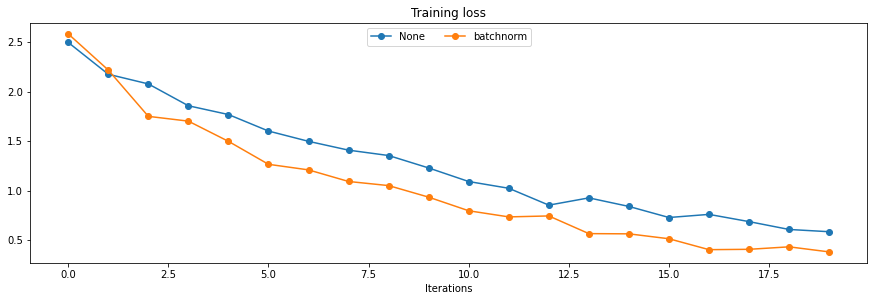

In [42]:
"""
    Ablation study: Batchnorm (subsample of data)

    Batch norm = faster in convergence rate
"""

solvers = {}
for bn in [None, 'batchnorm']:
    print('running with ', bn)
    model = MLP([100,100], activation='tanh', reg=5e-5, normalization=bn)
    solver = model.fit(X_dev, y_dev, X_val, y_val, sample_batches=True,
                        num_epochs=10,learning_rate=0.8,update_rule='sgd')

    solvers[bn] = solver

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iterations')

for bn, solver in list(solvers.items()):
  plt.subplot(3, 1, 1)
  plt.plot(solver['loss_history'], '-o', label=bn if bn != None else 'None')

for i in [1]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

running with regularization:  0
Finished epoch 1 / 10: loss 1.804159, train 0.596000, val 0.298000
Finished epoch 2 / 10: loss 1.647336, train 0.612000, val 0.303000
Finished epoch 3 / 10: loss 1.446063, train 0.696000, val 0.316000
Finished epoch 4 / 10: loss 1.394960, train 0.724000, val 0.342000
Finished epoch 5 / 10: loss 1.361718, train 0.700000, val 0.340000
Finished epoch 6 / 10: loss 1.244042, train 0.788000, val 0.330000
Finished epoch 7 / 10: loss 1.144641, train 0.828000, val 0.329000
Finished epoch 8 / 10: loss 1.094013, train 0.884000, val 0.310000
Finished epoch 9 / 10: loss 0.975934, train 0.880000, val 0.309000
Finished epoch 10 / 10: loss 0.875700, train 0.920000, val 0.324000
running with regularization:  1e-05
Finished epoch 1 / 10: loss 1.777402, train 0.568000, val 0.296000
Finished epoch 2 / 10: loss 1.671297, train 0.620000, val 0.316000
Finished epoch 3 / 10: loss 1.480568, train 0.728000, val 0.342000
Finished epoch 4 / 10: loss 1.386401, train 0.728000, val 0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

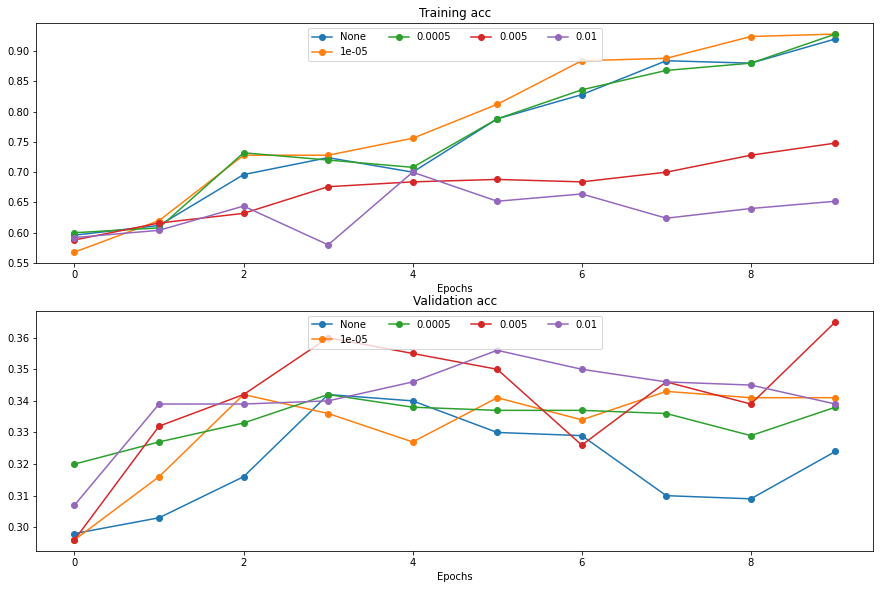

In [43]:
"""
    Ablation study: L2 weight decay (subsample of data)

    weight decay = 1.5%-2% increase in accuracy
"""

solvers = {}
for reg in [0, 1e-5, 5e-4, 5e-3, 1e-2]:
    print('running with regularization: ', reg)
    model = MLP([100,100], activation='tanh', reg=reg)
    solver = model.fit(X_train[:4000], y_train[:4000], X_val, y_val, 
                        sample_batches=True, num_epochs=10,learning_rate=0.8,update_rule='sgd')

    solvers[reg] = solver

plt.subplot(3, 1, 1)
plt.title('Training acc')
plt.xlabel('Epochs')

plt.subplot(3, 1, 2)
plt.title('Validation acc')
plt.xlabel('Epochs')

for reg, solver in list(solvers.items()):
    plt.subplot(3, 1, 1)
    plt.plot(solver['train_acc_history'], '-o', label=reg if reg != 0 else 'None')

    plt.subplot(3, 1, 2)
    plt.plot(solver['val_acc_history'], '-o', label=reg if reg != 0 else 'None')

for i in [1, 2]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

running with dropout 0.4
Finished epoch 1 / 10: loss 2.339429, train 0.372000, val 0.282000
Finished epoch 2 / 10: loss 2.121056, train 0.420000, val 0.305000
Finished epoch 3 / 10: loss 2.092927, train 0.472000, val 0.340000
Finished epoch 4 / 10: loss 1.959111, train 0.476000, val 0.329000
Finished epoch 5 / 10: loss 1.962404, train 0.512000, val 0.341000
Finished epoch 6 / 10: loss 1.920650, train 0.420000, val 0.338000
Finished epoch 7 / 10: loss 1.899144, train 0.560000, val 0.323000
Finished epoch 8 / 10: loss 1.869512, train 0.460000, val 0.355000
Finished epoch 9 / 10: loss 1.959123, train 0.516000, val 0.347000
Finished epoch 10 / 10: loss 2.021293, train 0.460000, val 0.346000
running with dropout 0.5
Finished epoch 1 / 10: loss 2.098008, train 0.460000, val 0.280000
Finished epoch 2 / 10: loss 2.008183, train 0.516000, val 0.334000
Finished epoch 3 / 10: loss 1.931379, train 0.508000, val 0.323000
Finished epoch 4 / 10: loss 1.850076, train 0.504000, val 0.328000
Finished ep

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

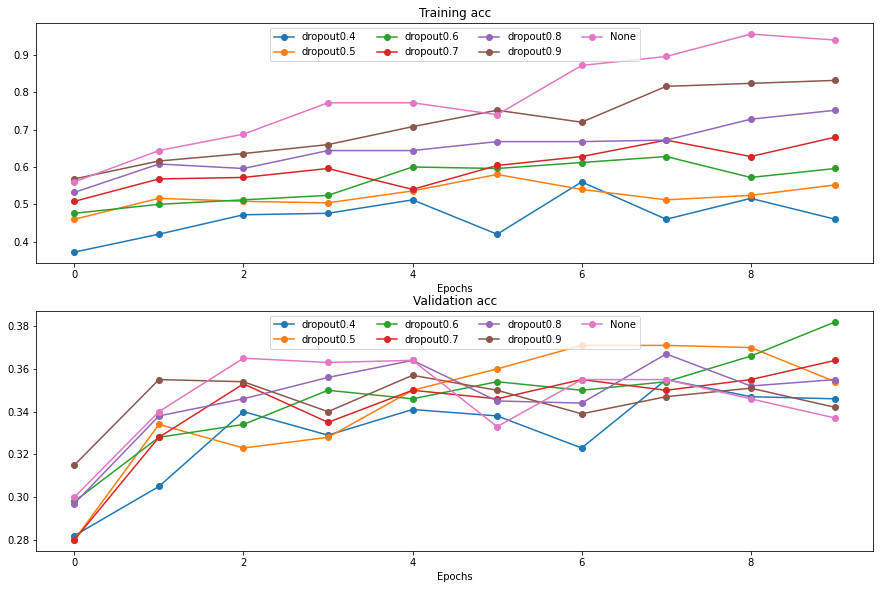

In [44]:
"""
    Ablation study: Dropout (subsample of data)

    Dropout = 2%-2.5% increase in accuracy
"""

solvers = {}
for do in [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    print('running with dropout', do)
    model = MLP([100,100], activation='tanh', reg=5e-5, dropout=do)
    solver = model.fit(X_train[:4000], y_train[:4000], X_val, y_val, 
                        sample_batches=True, num_epochs=10,learning_rate=0.8,update_rule='sgd')

    solvers[do] = solver

plt.subplot(3, 1, 1)
plt.title('Training acc')
plt.xlabel('Epochs')

plt.subplot(3, 1, 2)
plt.title('Validation acc')
plt.xlabel('Epochs')

for do, solver in list(solvers.items()):
  plt.subplot(3, 1, 1)
  plt.plot(solver['train_acc_history'], '-o', label="dropout"+str(do) if do != 1 else 'None')

  plt.subplot(3, 1, 2)
  plt.plot(solver['val_acc_history'], '-o', label="dropout"+str(do) if do != 1 else 'None')

for i in [1, 2]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

running with decay rate:  0.5
Finished epoch 1 / 5: loss 2.232643, train 0.560000, val 0.132000
Finished epoch 2 / 5: loss 1.928803, train 0.492000, val 0.160000
Finished epoch 3 / 5: loss 1.889440, train 0.508000, val 0.165000
Finished epoch 4 / 5: loss 1.780658, train 0.476000, val 0.170000
Finished epoch 5 / 5: loss 1.702521, train 0.520000, val 0.175000
running with decay rate:  0.7
Finished epoch 1 / 5: loss 2.261367, train 0.528000, val 0.157000
Finished epoch 2 / 5: loss 1.912758, train 0.572000, val 0.202000
Finished epoch 3 / 5: loss 1.771803, train 0.580000, val 0.212000
Finished epoch 4 / 5: loss 1.683930, train 0.524000, val 0.220000
Finished epoch 5 / 5: loss 1.503823, train 0.616000, val 0.217000
running with decay rate:  0.8
Finished epoch 1 / 5: loss 2.252903, train 0.440000, val 0.149000
Finished epoch 2 / 5: loss 1.880383, train 0.568000, val 0.171000
Finished epoch 3 / 5: loss 1.639603, train 0.684000, val 0.196000
Finished epoch 4 / 5: loss 1.458036, train 0.664000,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

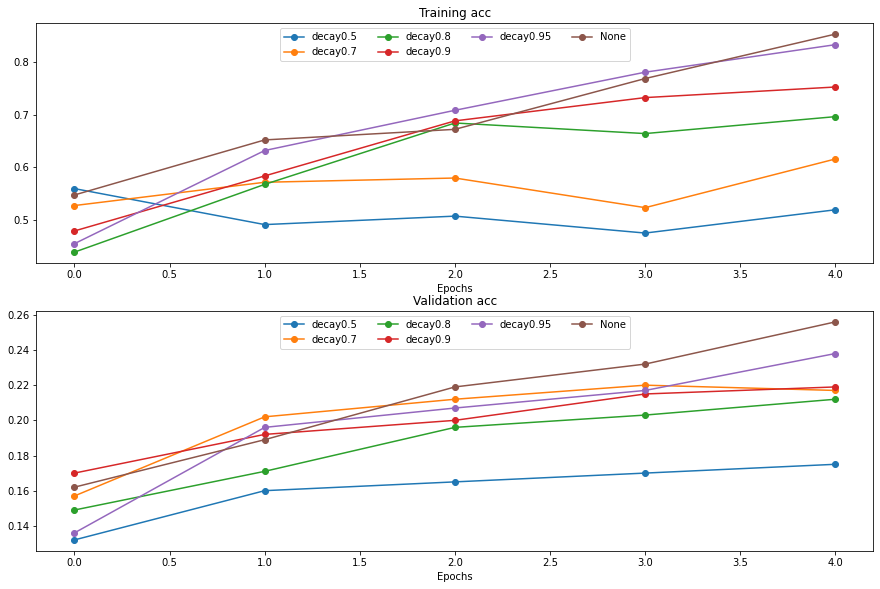

In [45]:
"""
    Ablation study: Learning rate decay (subsample of data)

    Learning rate decay = 1.5%-2% increase in accuracy
"""

solvers = {}
for ld in [0.5, 0.7, 0.8, 0.9, 0.95, 1]:
    print('running with decay rate: ', ld)
    model = MLP([100,100], activation='tanh', reg=5e-5)
    solver = model.fit(X_dev, y_dev, X_val, y_val, 
                        learning_rate_decay=ld, sample_batches=True,
                        num_epochs=5,learning_rate=0.8,update_rule='sgd')

    solvers[ld] = solver

plt.subplot(3, 1, 1)
plt.title('Training acc')
plt.xlabel('Epochs')

plt.subplot(3, 1, 2)
plt.title('Validation acc')
plt.xlabel('Epochs')

for ld, solver in list(solvers.items()):
  plt.subplot(3, 1, 1)
  plt.plot(solver['train_acc_history'], '-o', label="decay"+str(ld) if ld != 1 else 'None')

  plt.subplot(3, 1, 2)
  plt.plot(solver['val_acc_history'], '-o', label="decay"+str(ld) if ld != 1 else 'None')

for i in [1, 2]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

running with update rule:  sgd
Finished epoch 1 / 10: loss 2.428224, train 0.144000, val 0.114000
Finished epoch 2 / 10: loss 2.382458, train 0.164000, val 0.122000
Finished epoch 3 / 10: loss 2.270522, train 0.176000, val 0.120000
Finished epoch 4 / 10: loss 2.292474, train 0.176000, val 0.130000
Finished epoch 5 / 10: loss 2.181059, train 0.232000, val 0.138000
Finished epoch 6 / 10: loss 2.082800, train 0.328000, val 0.148000
Finished epoch 7 / 10: loss 2.117579, train 0.272000, val 0.145000
Finished epoch 8 / 10: loss 2.009654, train 0.352000, val 0.149000
Finished epoch 9 / 10: loss 1.940332, train 0.440000, val 0.153000
Finished epoch 10 / 10: loss 1.959520, train 0.412000, val 0.159000
running with update rule:  sgd_momentum
Finished epoch 1 / 10: loss 2.423383, train 0.136000, val 0.099000
Finished epoch 2 / 10: loss 2.396863, train 0.144000, val 0.107000
Finished epoch 3 / 10: loss 2.269990, train 0.192000, val 0.109000
Finished epoch 4 / 10: loss 2.230492, train 0.200000, val

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


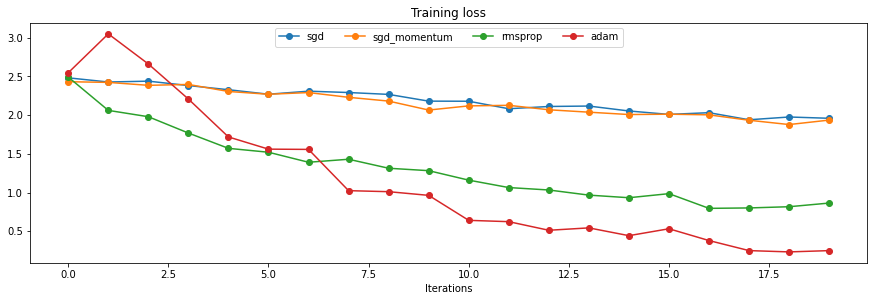

In [46]:
"""
    Ablation study: Update rule (subsample of data)

    sgd_momentum = no noticeable difference in convergence rate
    rmsprop = faster in convergence rate
    adam = faster in convergence rate
"""

solvers = {}
learning_rates = {'sgd': 1e-1, 'sgd_momentum': 1e-1, 'rmsprop': 1e-3, 'adam': 1e-1}
for update_rule in ['sgd', 'sgd_momentum', 'rmsprop', 'adam']:
    print('running with update rule: ', update_rule)
    model = MLP([100,100], activation='tanh', reg=5e-5)
    solver = model.fit(X_dev, y_dev, X_val, y_val, sample_batches=True,
                        num_epochs=10,learning_rate=learning_rates[update_rule],
                        update_rule=update_rule)

    solvers[update_rule] = solver

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iterations')

for update_rule, solver in list(solvers.items()):
  plt.subplot(3, 1, 1)
  plt.plot(solver['loss_history'], '-o', label=update_rule)

for i in [1, 1]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

running with activation function:  sigmoid
Finished epoch 1 / 10: loss 2.356842, train 0.208000, val 0.199000
Finished epoch 2 / 10: loss 2.228521, train 0.256000, val 0.235000
Finished epoch 3 / 10: loss 2.134010, train 0.300000, val 0.277000
Finished epoch 4 / 10: loss 2.073762, train 0.332000, val 0.312000
Finished epoch 5 / 10: loss 1.937225, train 0.380000, val 0.339000
Finished epoch 6 / 10: loss 1.965376, train 0.332000, val 0.347000
Finished epoch 7 / 10: loss 1.818137, train 0.428000, val 0.356000
Finished epoch 8 / 10: loss 1.807460, train 0.432000, val 0.360000
Finished epoch 9 / 10: loss 1.841366, train 0.380000, val 0.369000
Finished epoch 10 / 10: loss 1.914275, train 0.396000, val 0.375000

running with activation function:  tanh
Finished epoch 1 / 10: loss 1.818750, train 0.360000, val 0.374000
Finished epoch 2 / 10: loss 1.713290, train 0.444000, val 0.399000
Finished epoch 3 / 10: loss 1.764410, train 0.388000, val 0.397000
Finished epoch 4 / 10: loss 1.714157, train 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

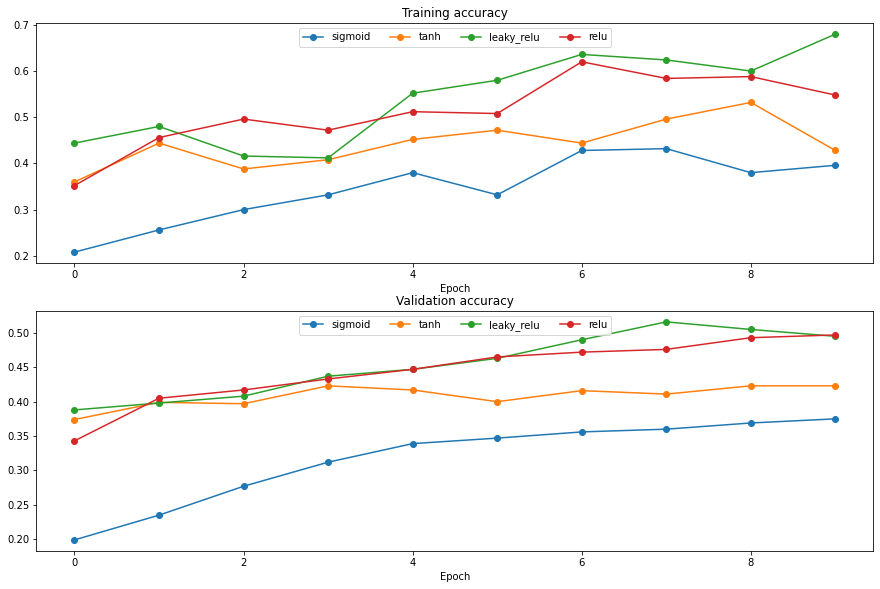

In [47]:
"""
    Abalation study: activation function (full data)

    leaky_relu: 5% increase in accuracy
    relu: 5% increase in accuracy
"""

solvers = {}
for activation in ['sigmoid', 'tanh', 'leaky_relu', 'relu']:
  print('running with activation function: ', activation)
  model = MLP([100,100], activation=activation, reg=5e-5)
  solver = model.fit(X_train, y_train, X_val, y_val, 
                    learning_rate=1e-1, num_epochs=10, update_rule="sgd")

  solvers[activation] = solver
  print()

plt.subplot(3, 1, 1)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 2)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for activation, solver in list(solvers.items()):
  
  plt.subplot(3, 1, 1)
  plt.plot(solver['train_acc_history'], '-o', label=activation)

  plt.subplot(3, 1, 2)
  plt.plot(solver['val_acc_history'], '-o', label=activation)
  
for i in [1, 2]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

In [48]:
# Ref: cs231
def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

np.random.seed(0)
N, D, H1, H2, C = 2, 15, 20, 30, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))

for reg in [0, 3.14]:
  print('Running check with reg = ', reg)
  model = MLP([H1, H2], input_dim=D, num_classes=C, activation='sigmoid',
                            reg=reg, dropout=0.8,normalization='batchnorm',dtype=np.float64, seed=0)

  loss, grads = model.loss(X, y)
  print('Initial loss: ', loss)
  
  # Most of the errors should be on the order of e-7 or smaller.   
  for name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    grad_num = eval_numerical_gradient(f, model.params[name], h=1e-5)
    print('%s relative error: %.2e' % (name, rel_error(grad_num, grads[name])))

Running check with reg =  0
Initial loss:  6.169642040210517
W1 relative error: 1.50e-02
W2 relative error: 4.08e-03
W3 relative error: 2.89e-06
b1 relative error: 0.00e+00
b2 relative error: 2.22e-08
b3 relative error: 1.86e-08
beta1 relative error: 8.88e-03
beta2 relative error: 1.13e-08
gamma1 relative error: 9.38e-07
gamma2 relative error: 5.72e-09
Running check with reg =  3.14
Initial loss:  1469.0945858401162
W1 relative error: 6.14e-08
W2 relative error: 5.64e-07
W3 relative error: 2.98e-07
b1 relative error: 2.22e-08
b2 relative error: 1.39e-09
b3 relative error: 6.28e-06
beta1 relative error: 8.88e-08
beta2 relative error: 6.89e-07
gamma1 relative error: 1.52e-07
gamma2 relative error: 6.77e-07


In [49]:
"""
    Ablation study: learning rate and regularization strength (full data)

    Result: Optimal learning rate = 1e-3, regularization = 5e-5
"""

def generate_random_hyperparameters(lr_min, lr_max, reg_min, reg_max):
    lr = 10**np.random.uniform(lr_min, lr_max)
    reg = 10**np.random.uniform(reg_min, reg_max)
    return lr, reg

def random_search_hyperparams(lr_values, reg_values):
    lr = lr_values[np.random.randint(0,len(lr_values))]
    reg = reg_values[np.random.randint(0,len(reg_values))]
    return lr, reg


best_val_acc = -1;
best_net = None
best_stats = []

np.random.seed(0)

for i in range(10):
    # lr, reg = generate_random_hyperparameters(-5, 5, -6, 6)
    # lr, reg = generate_random_hyperparameters(-3.5, -3, -7, -5)
    lr, reg = random_search_hyperparams([5e-4, 8e-4, 1e-3],[5e-7, 1e-6, 5e-5, 1e-4])
    nn = MLP([100, 100], dropout=0.8, normalization='batchnorm',reg=reg)
    stats = nn.fit(X_train, y_train, X_val, y_val, 
                   learning_rate=lr, learning_rate_decay=0.95,
                   num_epochs=10, batch_size=250, update_rule="adam",
                   sample_batches=True, verbose=True)

    train_acc = stats['train_acc_history'][-1]
    val_acc = stats['val_acc_history'][-1]

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_net = nn
        best_stats = stats
    print('lr %e reg %e  train accuracy: %f val accuracy: %f' % (
                lr, reg, train_acc, val_acc))
print('best validation accuracy achieved: %f' % best_val_acc)


Finished epoch 1 / 10: loss 2.081563, train 0.348000, val 0.315000
Finished epoch 2 / 10: loss 1.841806, train 0.376000, val 0.373000
Finished epoch 3 / 10: loss 1.918730, train 0.364000, val 0.400000
Finished epoch 4 / 10: loss 1.733040, train 0.404000, val 0.401000
Finished epoch 5 / 10: loss 1.534667, train 0.504000, val 0.418000
Finished epoch 6 / 10: loss 1.641592, train 0.460000, val 0.427000
Finished epoch 7 / 10: loss 1.602328, train 0.512000, val 0.433000
Finished epoch 8 / 10: loss 1.506969, train 0.516000, val 0.450000
Finished epoch 9 / 10: loss 1.670417, train 0.480000, val 0.454000
Finished epoch 10 / 10: loss 1.537399, train 0.472000, val 0.457000
lr 5.000000e-04 reg 1.000000e-04  train accuracy: 0.472000 val accuracy: 0.457000
Finished epoch 1 / 10: loss 1.876621, train 0.356000, val 0.349000
Finished epoch 2 / 10: loss 1.671126, train 0.376000, val 0.396000
Finished epoch 3 / 10: loss 1.779199, train 0.468000, val 0.430000
Finished epoch 4 / 10: loss 1.674672, train 0.

running with batch_size  8
Finished epoch 1 / 10: loss 1.727633, train 0.625000, val 0.465000
Finished epoch 2 / 10: loss 2.003420, train 0.375000, val 0.487000
Finished epoch 3 / 10: loss 1.491703, train 0.750000, val 0.512000
Finished epoch 4 / 10: loss 2.047958, train 0.375000, val 0.521000
Finished epoch 5 / 10: loss 1.073039, train 0.625000, val 0.531000
Finished epoch 6 / 10: loss 1.549690, train 0.625000, val 0.528000
Finished epoch 7 / 10: loss 1.418450, train 0.500000, val 0.530000
Finished epoch 8 / 10: loss 1.518399, train 0.500000, val 0.529000
Finished epoch 9 / 10: loss 1.272233, train 0.750000, val 0.526000
Finished epoch 10 / 10: loss 1.861111, train 0.375000, val 0.528000

running with batch_size  16
Finished epoch 1 / 10: loss 1.009062, train 0.687500, val 0.458000
Finished epoch 2 / 10: loss 1.537243, train 0.437500, val 0.521000
Finished epoch 3 / 10: loss 1.461466, train 0.500000, val 0.544000
Finished epoch 4 / 10: loss 1.517600, train 0.625000, val 0.535000
Finis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

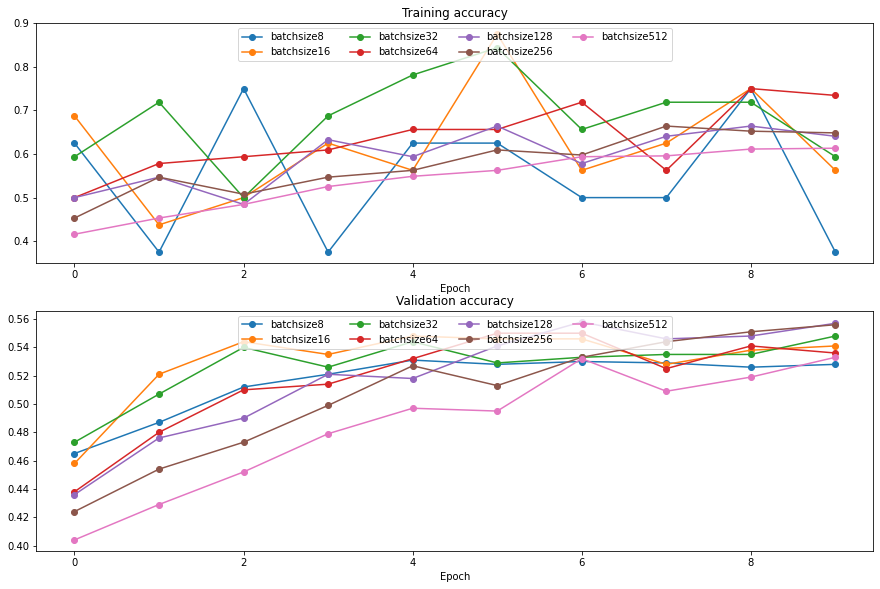

In [50]:
"""
    Abalation study: Batch size for batch normalization (full data)

    Result: Optimal batch size = 32
"""
solvers = {}
for batch_size in [8, 16, 32, 64, 128, 256, 512]:
  print('running with batch_size ', batch_size)
  hidden_dims = [192]
  model = MLP(hidden_dims, normalization='batchnorm', reg=5e-5)
  solver = model.fit(X_train, y_train, X_val, y_val,
                    learning_rate=1e-3, num_epochs=10, batch_size=batch_size,update_rule="adam")

  solvers[batch_size] = solver
  print()

plt.subplot(3, 1, 1)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 2)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for batch_size, solver in list(solvers.items()):
  
  plt.subplot(3, 1, 1)
  plt.plot(solver['train_acc_history'], '-o', label="batchsize"+str(batch_size))

  plt.subplot(3, 1, 2)
  plt.plot(solver['val_acc_history'], '-o', label="batchsize"+str(batch_size))
  
for i in [1, 2]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

running with dropout rate  0.3
Finished epoch 1 / 20: loss 2.173010, train 0.336000, val 0.336000
Finished epoch 2 / 20: loss 1.934536, train 0.408000, val 0.407000
Finished epoch 3 / 20: loss 1.868722, train 0.436000, val 0.427000
Finished epoch 4 / 20: loss 1.775441, train 0.436000, val 0.431000
Finished epoch 5 / 20: loss 1.856713, train 0.444000, val 0.453000
Finished epoch 6 / 20: loss 1.763807, train 0.416000, val 0.445000
Finished epoch 7 / 20: loss 1.786513, train 0.428000, val 0.446000
Finished epoch 8 / 20: loss 1.827677, train 0.432000, val 0.454000
Finished epoch 9 / 20: loss 1.707713, train 0.456000, val 0.452000
Finished epoch 10 / 20: loss 1.748224, train 0.420000, val 0.457000
Finished epoch 11 / 20: loss 1.666472, train 0.504000, val 0.471000
Finished epoch 12 / 20: loss 1.531989, train 0.556000, val 0.456000
Finished epoch 13 / 20: loss 1.643265, train 0.500000, val 0.462000
Finished epoch 14 / 20: loss 1.752494, train 0.464000, val 0.473000
Finished epoch 15 / 20: lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

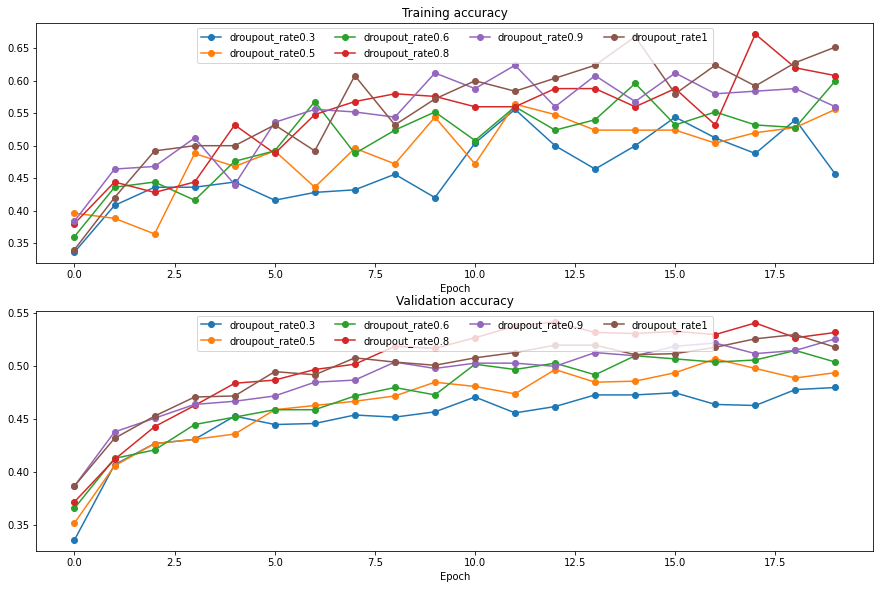

In [51]:
"""
    Abalation study: dropout rate (full data)

    Result: Optimal dropout rate = 0.8
"""
solvers = {}
for dropout_rate in [0.3, 0.5, 0.6, 0.8, 0.9, 1]:
  print('running with dropout rate ', dropout_rate)
  hidden_dims = [100]
  model = MLP(hidden_dims, dropout=dropout_rate)
  solver = model.fit(X_train, y_train, X_val, y_val, 
                    learning_rate=1e-3, num_epochs=20, update_rule="adam")

  solvers[dropout_rate] = solver
  print()

plt.subplot(3, 1, 1)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 2)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for dropout_rate, solver in list(solvers.items()):
  
  plt.subplot(3, 1, 1)
  plt.plot(solver['train_acc_history'], '-o', label="droupout_rate"+str(dropout_rate))

  plt.subplot(3, 1, 2)
  plt.plot(solver['val_acc_history'], '-o', label="droupout_rate"+str(dropout_rate))
  
for i in [1, 2]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

running with num of hidden layers:  1
hidden neurons are:  [50]
Finished epoch 1 / 10: loss 1.878385, train 0.324000, val 0.336000
Finished epoch 2 / 10: loss 1.668779, train 0.420000, val 0.406000
Finished epoch 3 / 10: loss 1.674775, train 0.380000, val 0.419000
Finished epoch 4 / 10: loss 1.425350, train 0.484000, val 0.433000
Finished epoch 5 / 10: loss 1.604603, train 0.432000, val 0.448000
Finished epoch 6 / 10: loss 1.369646, train 0.544000, val 0.447000
Finished epoch 7 / 10: loss 1.494910, train 0.472000, val 0.456000
Finished epoch 8 / 10: loss 1.354858, train 0.524000, val 0.449000
Finished epoch 9 / 10: loss 1.462602, train 0.488000, val 0.471000
Finished epoch 10 / 10: loss 1.458696, train 0.468000, val 0.462000

running with num of hidden layers:  2
hidden neurons are:  [75, 200]
Finished epoch 1 / 10: loss 1.608434, train 0.432000, val 0.399000
Finished epoch 2 / 10: loss 1.545532, train 0.448000, val 0.436000
Finished epoch 3 / 10: loss 1.473388, train 0.444000, val 0.4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

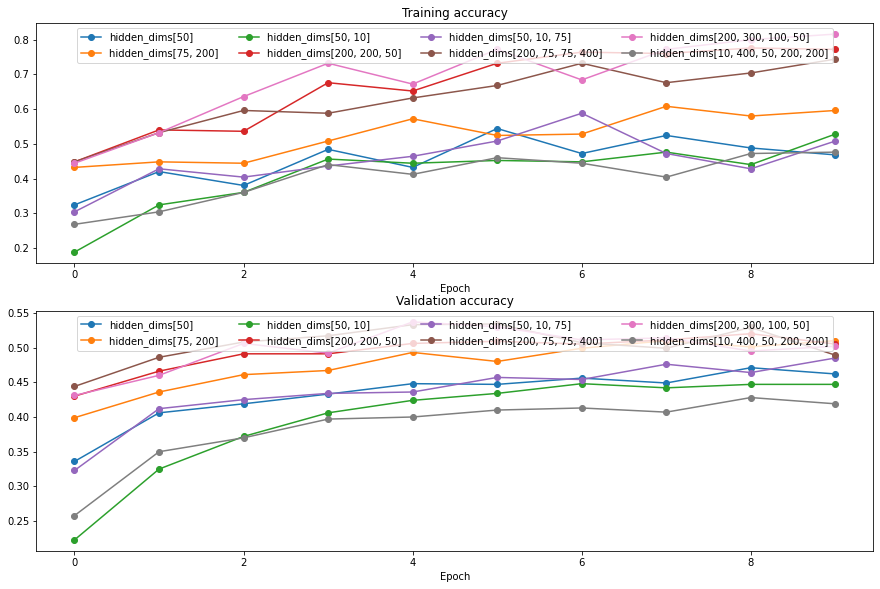

In [52]:
"""
    Abalation study: number of hidden layers (full data)

    Result: Optimal number of hidden layers = 3
"""
solvers = {}
hidden = [10,50,75,100,200,300,400]
for num_hidden in [1, 2, 2, 3, 3, 4, 4, 5]:
  print('running with num of hidden layers: ', num_hidden)
  hidden_dims = []
  for i in range(num_hidden):
      hidden_dims.append(hidden[np.random.randint(0, len(hidden))])
  print('hidden neurons are: ', hidden_dims)
  model = MLP(hidden_dims)
  solver = model.fit(X_train, y_train, X_val, y_val, 
                    learning_rate=1e-3, num_epochs=10,update_rule="adam")

  solvers[str(hidden_dims)] = solver
  print()

plt.subplot(3, 1, 1)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 2)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for hidden_dims, solver in list(solvers.items()):
  
  plt.subplot(3, 1, 1)
  plt.plot(solver['train_acc_history'], '-o', label="hidden_dims"+str(hidden_dims))

  plt.subplot(3, 1, 2)
  plt.plot(solver['val_acc_history'], '-o', label="hidden_dims"+str(hidden_dims))
  
for i in [1, 2]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

running with num of hidden layers:  [192, 96, 48]
Finished epoch 1 / 15: loss 1.525059, train 0.468000, val 0.425000
Finished epoch 2 / 15: loss 1.472414, train 0.508000, val 0.462000
Finished epoch 3 / 15: loss 1.290002, train 0.592000, val 0.493000
Finished epoch 4 / 15: loss 1.225510, train 0.544000, val 0.512000
Finished epoch 5 / 15: loss 1.100636, train 0.612000, val 0.509000
Finished epoch 6 / 15: loss 1.006421, train 0.644000, val 0.505000
Finished epoch 7 / 15: loss 1.037431, train 0.680000, val 0.520000
Finished epoch 8 / 15: loss 0.914767, train 0.720000, val 0.502000
Finished epoch 9 / 15: loss 0.941490, train 0.732000, val 0.514000
Finished epoch 10 / 15: loss 0.951270, train 0.676000, val 0.502000
Finished epoch 11 / 15: loss 0.796229, train 0.744000, val 0.513000
Finished epoch 12 / 15: loss 0.904982, train 0.716000, val 0.520000
Finished epoch 13 / 15: loss 0.804767, train 0.720000, val 0.507000
Finished epoch 14 / 15: loss 0.808288, train 0.772000, val 0.505000
Finishe

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

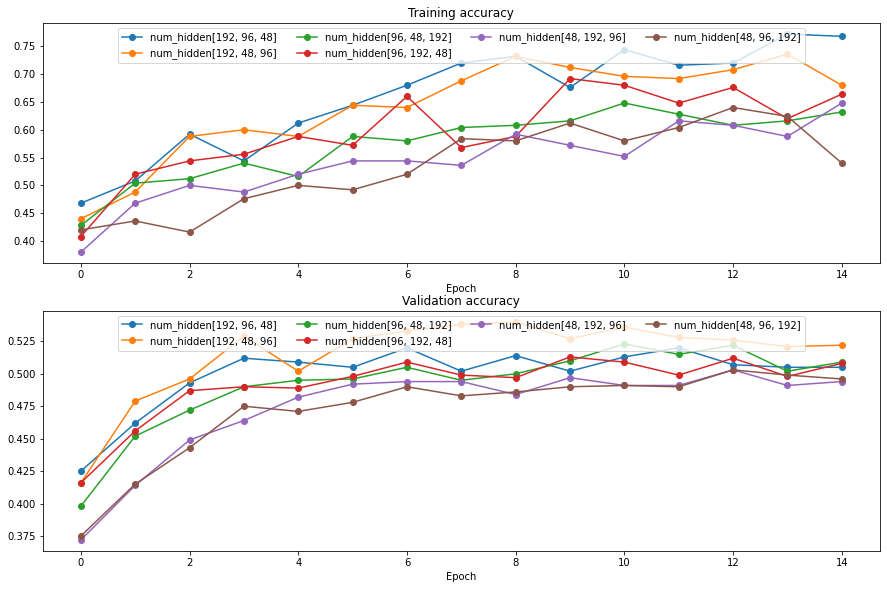

In [53]:
"""
    Abalation study: size of 3 hidden layers (subsample of data)

    Result: Optimal hidden neuron size: [192, 96，48]
"""
solvers = {}

hidden = [[192, 96, 48], [192,48,96], [96, 48, 192], [96, 192, 48], [48, 192, 96], [48, 96, 192]]
for num_hidden in hidden:
  print('running with num of hidden layers: ', num_hidden)
  model = MLP(num_hidden)
  solver = model.fit(X_train, y_train, X_val, y_val, 
                    learning_rate=1e-3, num_epochs=15, update_rule="adam")

  solvers[str(num_hidden)] = solver
  print()

plt.subplot(3, 1, 1)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 2)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for num_hidden, solver in list(solvers.items()):
  
  plt.subplot(3, 1, 1)
  plt.plot(solver['train_acc_history'], '-o', label="num_hidden"+str(num_hidden))

  plt.subplot(3, 1, 2)
  plt.plot(solver['val_acc_history'], '-o', label="num_hidden"+str(num_hidden))
  
for i in [1, 2]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

In [75]:
"""
    Optimal model:
    - learning rate = 1e-3,
    - regularization = 5e-5
    - batch_size = 32
    - dropout_rate = 0.8
    - num_hidden = 3
    - hidden_size = [192, 96, 48]
    - learning_rate_decay = 0.95
    - activation: relu
    - update_rule = "adam"

    For a network with 4 layers, the architecture will be

    {affine - batch norm - relu - dropout} x (3) - affine - softmax

    and the {...} block is repeated 3 times.

"""

best_val_acc = -1;
best_net = None
best_stats = []

lr, reg, batch_size, dropout_rate, num_hidden = 1e-3, 5e-5, 32, 0.8, 3
nn = MLP([192, 96, 48], activation='relu',dropout=dropout_rate, normalization='batchnorm',reg=reg)
stats = nn.fit(np.vstack([X_train, X_val]), np.hstack([y_train, y_val]), X_test, y_test, 
                learning_rate=lr, learning_rate_decay=0.95,
                num_epochs=30, batch_size=batch_size, update_rule="adam",
                sample_batches=True, verbose=True)

train_acc = stats['train_acc_history'][-1]
val_acc = stats['val_acc_history'][-1]

if val_acc > best_val_acc:
    best_val_acc = val_acc
    best_net = nn
    best_stats = stats
print('best train accuracy: %f val accuracy: %f' % (train_acc, best_val_acc))

Finished epoch 1 / 30: loss 1.834830, train 0.281250, val 0.418900
Finished epoch 2 / 30: loss 1.781065, train 0.593750, val 0.465700
Finished epoch 3 / 30: loss 1.563167, train 0.500000, val 0.494400
Finished epoch 4 / 30: loss 1.438347, train 0.531250, val 0.510900
Finished epoch 5 / 30: loss 1.677346, train 0.437500, val 0.518600
Finished epoch 6 / 30: loss 1.779101, train 0.593750, val 0.522800
Finished epoch 7 / 30: loss 1.464458, train 0.437500, val 0.529600
Finished epoch 8 / 30: loss 1.246025, train 0.625000, val 0.538500
Finished epoch 9 / 30: loss 1.671761, train 0.593750, val 0.540200
Finished epoch 10 / 30: loss 1.101051, train 0.781250, val 0.542800
Finished epoch 11 / 30: loss 1.562078, train 0.531250, val 0.542200
Finished epoch 12 / 30: loss 1.645663, train 0.593750, val 0.539700
Finished epoch 13 / 30: loss 1.482592, train 0.562500, val 0.544300
Finished epoch 14 / 30: loss 1.239110, train 0.781250, val 0.545200
Finished epoch 15 / 30: loss 1.457036, train 0.656250, va

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
No handles with labels found to put in legend.


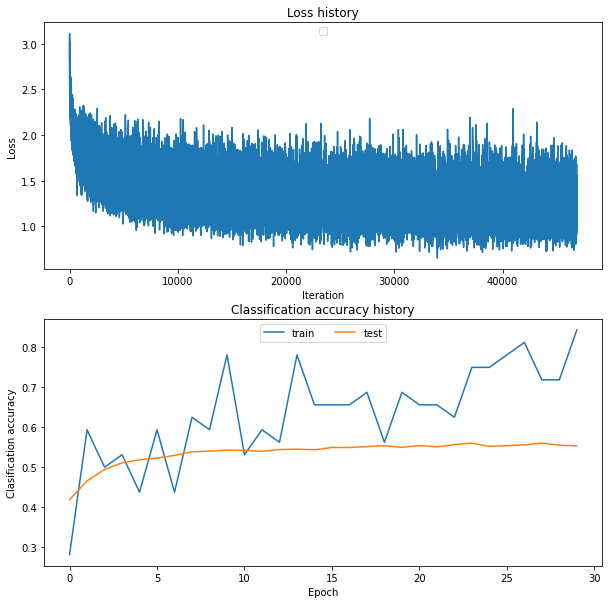

In [76]:
plt.subplot(2, 1, 1)
plt.plot(best_stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(best_stats['train_acc_history'], label='train')
plt.plot(best_stats['val_acc_history'], label='test')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()

for i in [1, 2]:
  plt.subplot(2, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(10, 10)
plt.show()

In [77]:
# Test accuracy
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)  

Test accuracy:  0.5535


In [57]:
# F1 score for evaluation

y_pred = best_net.predict(X_test)
y_true = y_test

f1_score = []
precision = []
recall = []
label = [i for i in range(10)]
for i in label:
    # class i: true positive (tp), false positive (fp), false negative(fn)
    tp, fp, fn = 0, 0, 0 
    for y1, y2 in zip(y_true, y_pred):
        if y1 == i and y2 == i:
            tp += 1
        elif y1 != i and y2 == i:
            fp += 1
        elif y1 == i and y2 != i:
            fn += 1
    precision_i = tp / (tp + fp)
    recall_i = tp / (tp + fn)
    f_score_i = 2 * (precision_i * recall_i) / (precision_i + recall_i)
    
    # align with sklearn output precision
    precision.append(round(precision_i, 8))
    recall.append(round(recall_i, 8))
    f1_score.append(round(f_score_i, 8))  

for l, p, r, f in zip(label, precision, recall, f1_score):
    print("Class {}: Precision {}, Recall {}, f1 score {}".format(l, p, r, f))

Class 0: Precision 0.62326044, Recall 0.627, f1 score 0.62512463
Class 1: Precision 0.67453294, Recall 0.686, f1 score 0.68021815
Class 2: Precision 0.45208568, Recall 0.401, f1 score 0.42501325
Class 3: Precision 0.36373507, Recall 0.335, f1 score 0.34877668
Class 4: Precision 0.46332046, Recall 0.48, f1 score 0.47151277
Class 5: Precision 0.4595163, Recall 0.437, f1 score 0.4479754
Class 6: Precision 0.58955896, Recall 0.655, f1 score 0.62055898
Class 7: Precision 0.64912281, Recall 0.629, f1 score 0.638903
Class 8: Precision 0.64779874, Recall 0.721, f1 score 0.68244203
Class 9: Precision 0.60262892, Recall 0.596, f1 score 0.59929613
